In [10]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from loguru import logger

import warnings
warnings.simplefilter("ignore")

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

%matplotlib inline

In [11]:
def create_histogram(df, column_name, hue=None):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, hue=hue, kde=False, color='skyblue')
    plt.title(f'Histograma de {column_name}' + (f' por {hue}' if hue else ''))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

def create_countplot(df, column_name, hue=None):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=column_name, hue=hue, order=df[column_name].value_counts().index,color = 'skyblue')
    plt.title(f'Count Plot de {column_name}' + (f' por {hue}' if hue else ''))
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.show()

In [12]:
logger.info("informacion demografica")
path_data = '../data/'
df = pd.read_csv(path_data + 'datos_previos_anonimizados.csv',sep=',')
df.head(1)

2024-12-05 17:57:18.703 | INFO     | __main__:<module>:1 - informacion demografica


,rut,estado,cohorte,nem,puntaje_ingreso,puntaje_psu,preferencia,psu_matematica,psu_lenguaje,region,tipo_colegio,egreso,continuidad,porcentaje_beca
0,507,Eliminado,2012,0.0,0,0,0,0,0,S/R,Sin Información,NaN,NaN,100


In [13]:
# Información sobre los tipos de datos y valores no nulos en cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rut              695 non-null    int64  
 1   estado           695 non-null    object 
 2   cohorte          695 non-null    int64  
 3   nem              695 non-null    float64
 4   puntaje_ingreso  695 non-null    int64  
 5   puntaje_psu      695 non-null    int64  
 6   preferencia      695 non-null    int64  
 7   psu_matematica   695 non-null    int64  
 8   psu_lenguaje     695 non-null    int64  
 9   region           695 non-null    object 
 10  tipo_colegio     695 non-null    object 
 11  egreso           672 non-null    float64
 12  continuidad      672 non-null    float64
 13  porcentaje_beca  695 non-null    int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 76.1+ KB


In [14]:
# Verificar duplicados en el conjunto de datos
duplicates = df.duplicated()

# Contar el número de filas duplicadas
num_duplicates = duplicates.sum()
print("Número de filas duplicadas:", num_duplicates)

Número de filas duplicadas: 0


In [15]:
# Obtener nombres de columnas según tipos de datos
variable_objetivo = ''

columnas_flotantes = [x for x in list(df.select_dtypes(include=['float64']).columns) if x!=variable_objetivo]
columnas_enteras = [x for x in list(df.select_dtypes(include=['int32', 'int64']).columns) if x!=variable_objetivo] 
columnas_objetos =  [x for x in list(df.select_dtypes(include=['object']).columns) if x!=variable_objetivo] 

# Mostrar nombres de columnas por tipo de datos
print(f"Variable Objetivo: {variable_objetivo}")
print()
print("Total Columnas flotantes:", len(columnas_flotantes))
print("Columnas flotantes:", columnas_flotantes)
print()
print("Total Columnas enteras:", len(columnas_enteras))
print("Columnas enteras:", columnas_enteras)
print()
print("Total Columnas objetos:", len(columnas_objetos))
print("Columnas objetos:", columnas_objetos)

Variable Objetivo: 

Total Columnas flotantes: 3
Columnas flotantes: ['nem', 'egreso', 'continuidad']

Total Columnas enteras: 8
Columnas enteras: ['rut', 'cohorte', 'puntaje_ingreso', 'puntaje_psu', 'preferencia', 'psu_matematica', 'psu_lenguaje', 'porcentaje_beca']

Total Columnas objetos: 3
Columnas objetos: ['estado', 'region', 'tipo_colegio']


In [16]:
df[ 'puntaje_ingreso'] = df[ 'puntaje_ingreso'].replace(0,np.nan)

puntaje_ingreso
Univariado


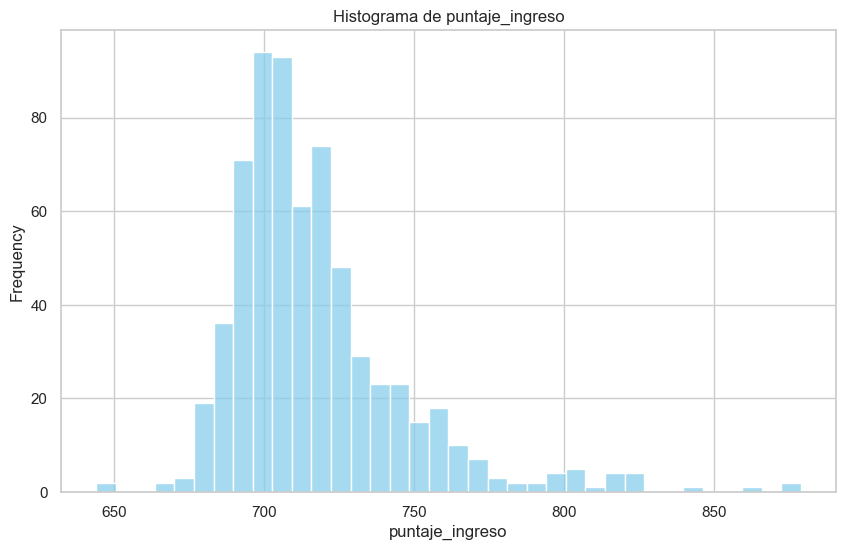

Bivariado


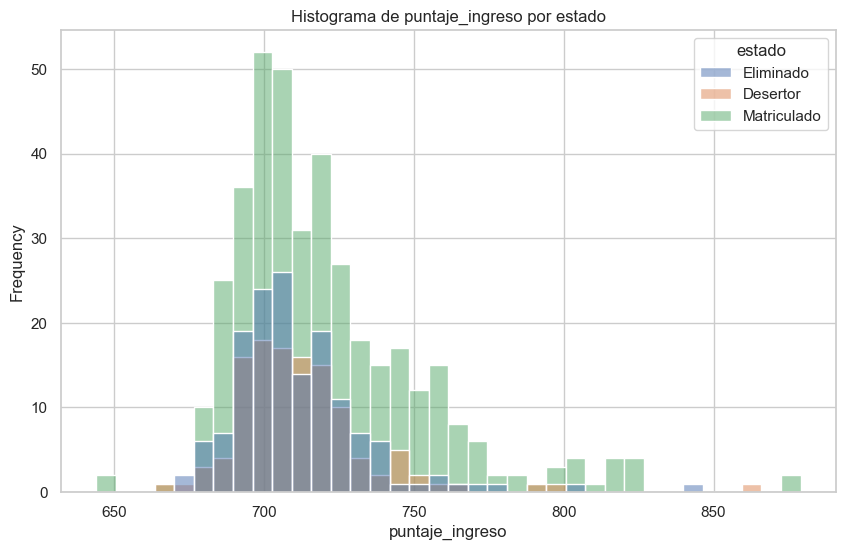

puntaje_psu
Univariado


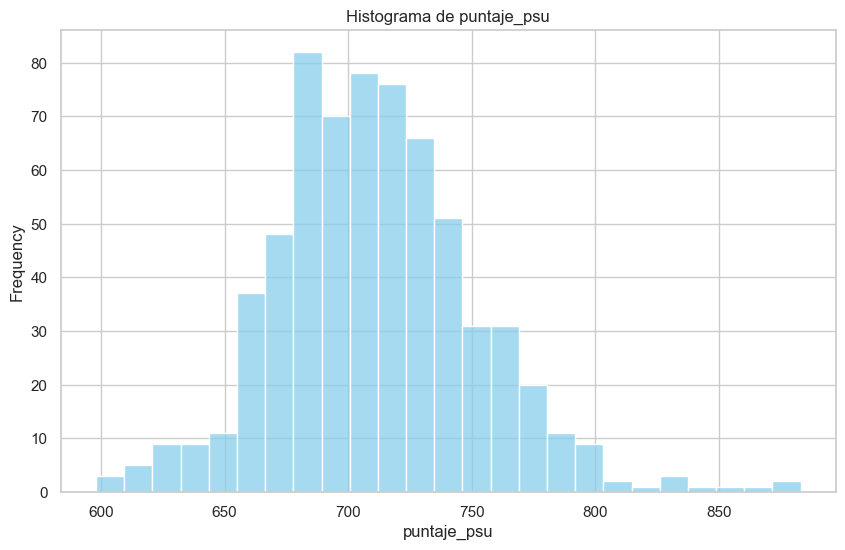

Bivariado


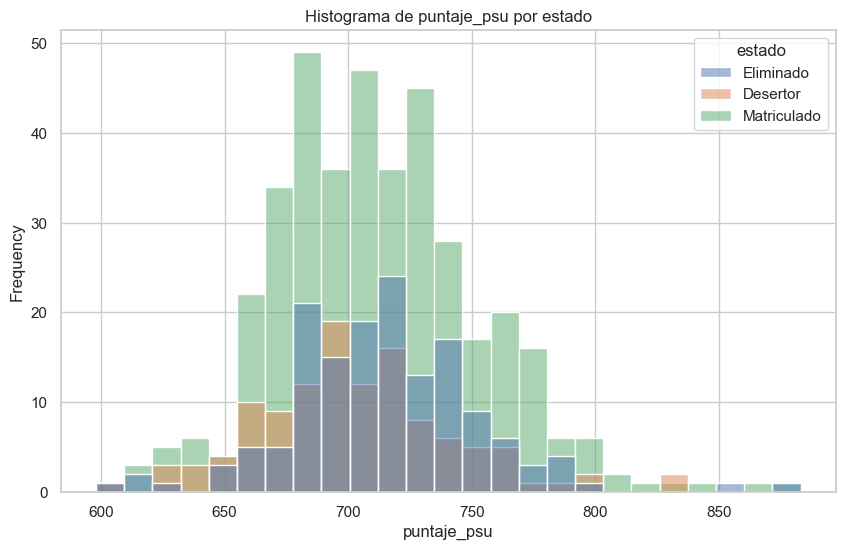

psu_lenguaje
Univariado


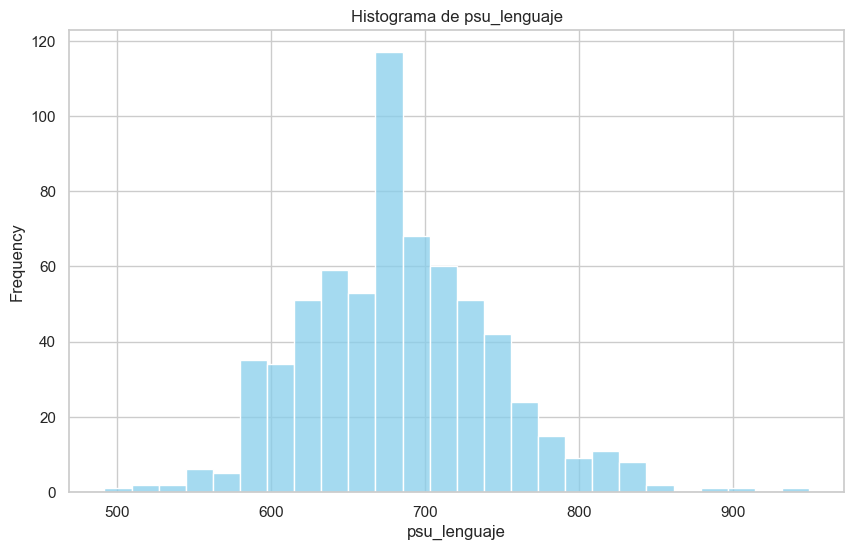

Bivariado


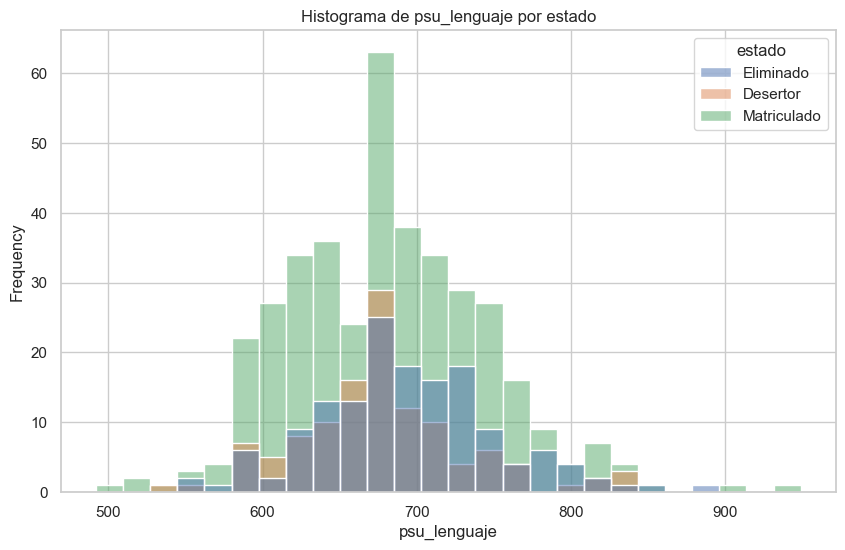

psu_matematica
Univariado


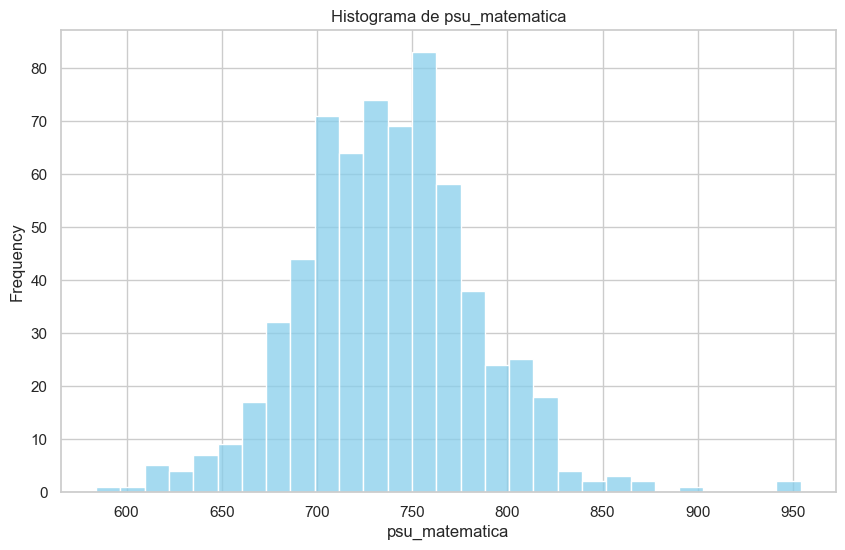

Bivariado


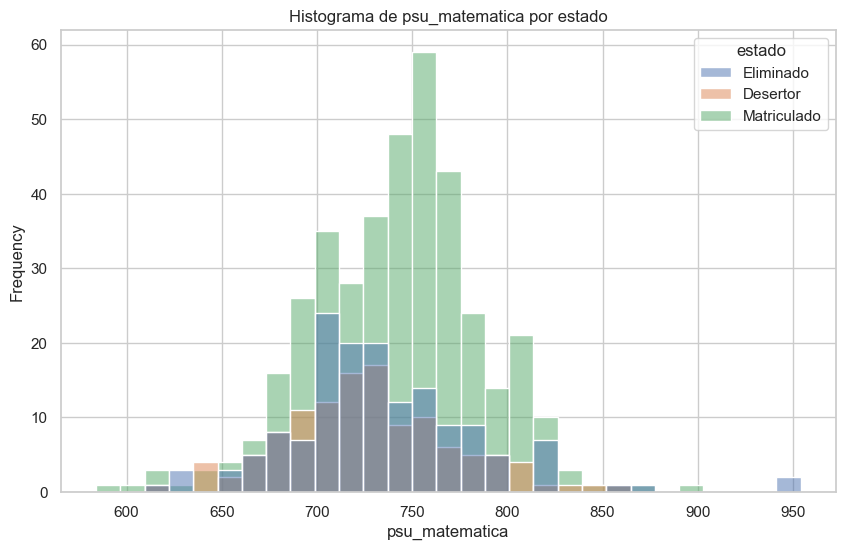

nem
Univariado


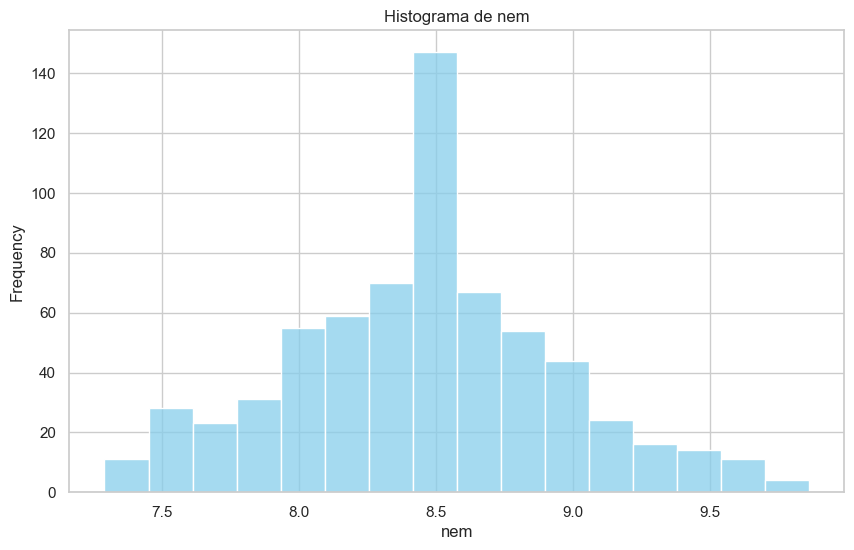

Bivariado


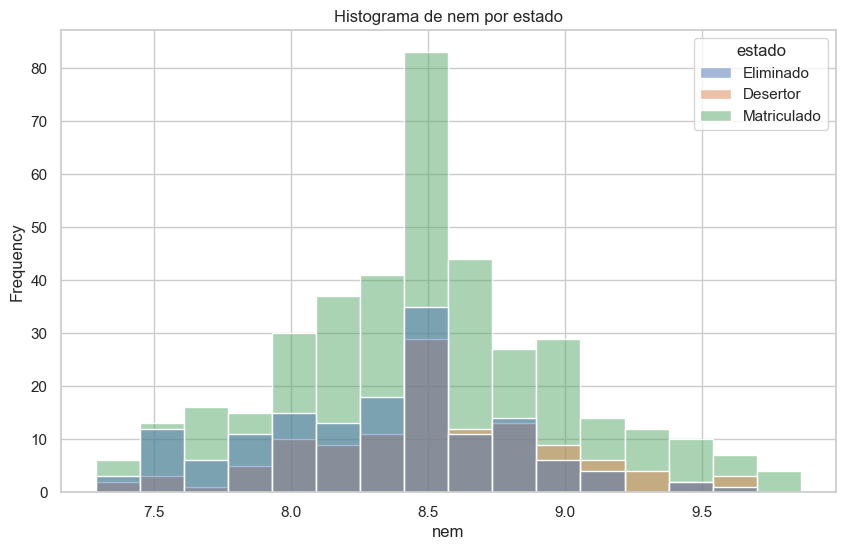

porcentaje_beca
Univariado


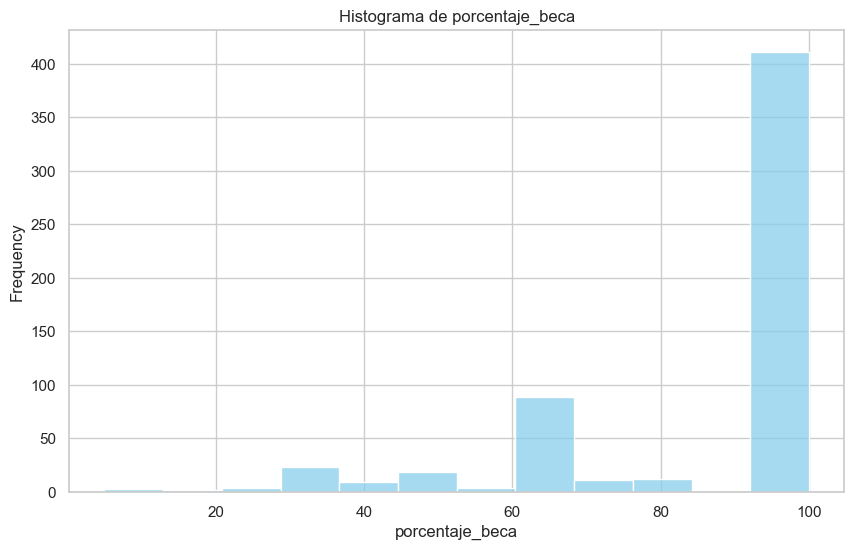

Bivariado


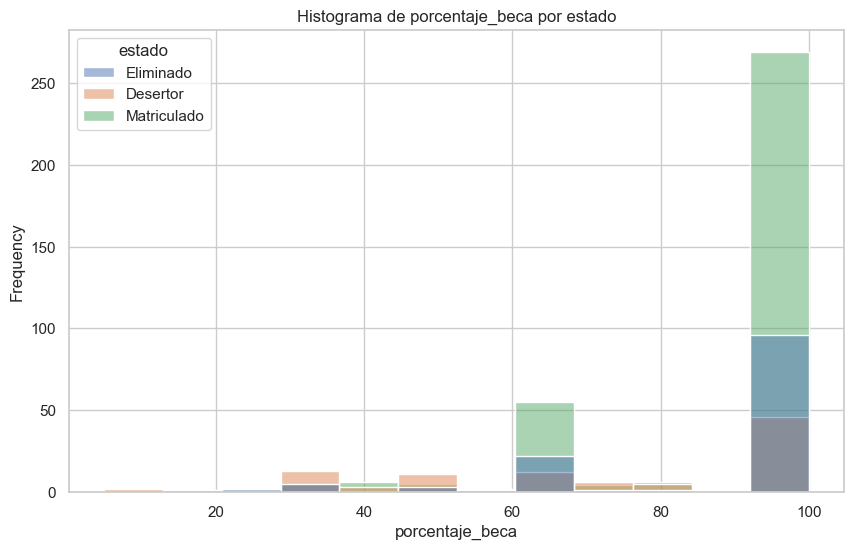

In [17]:
cols_hist = [
    'puntaje_ingreso','puntaje_psu', 'psu_lenguaje','psu_matematica' ,
    'nem','porcentaje_beca'
    
]

# Crear histogramas para columnas numéricas
for column in cols_hist:
    
    print(column)
    df[ column] = df[column].replace(0,np.nan)
    print('Univariado')
    create_histogram(df, column)
    print('Bivariado')
    create_histogram(df, column,'estado')

region
Univariado


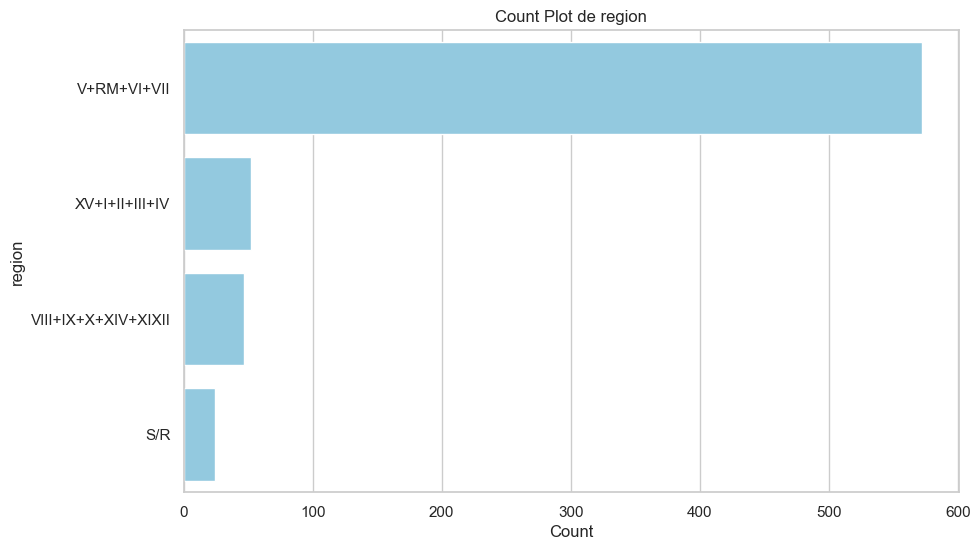

Bivariado


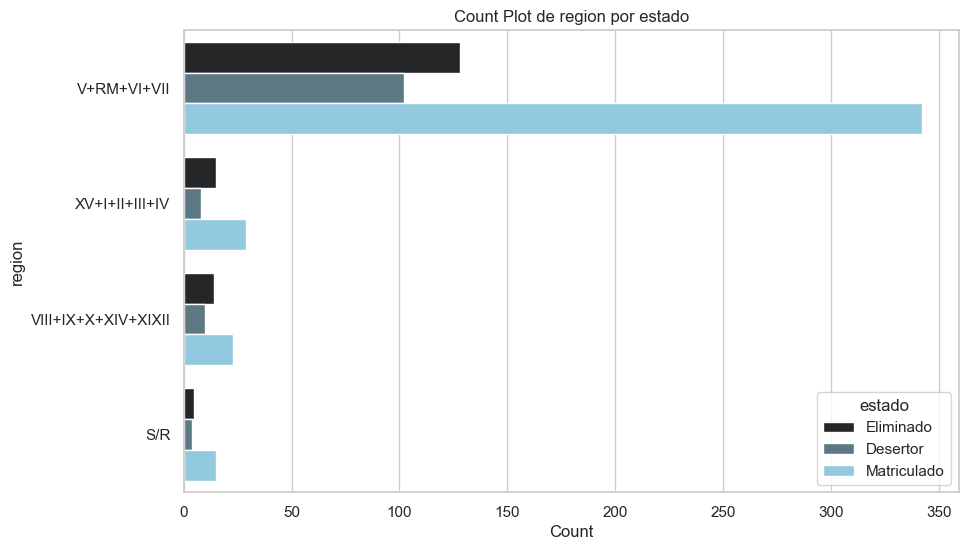

tipo_colegio
Univariado


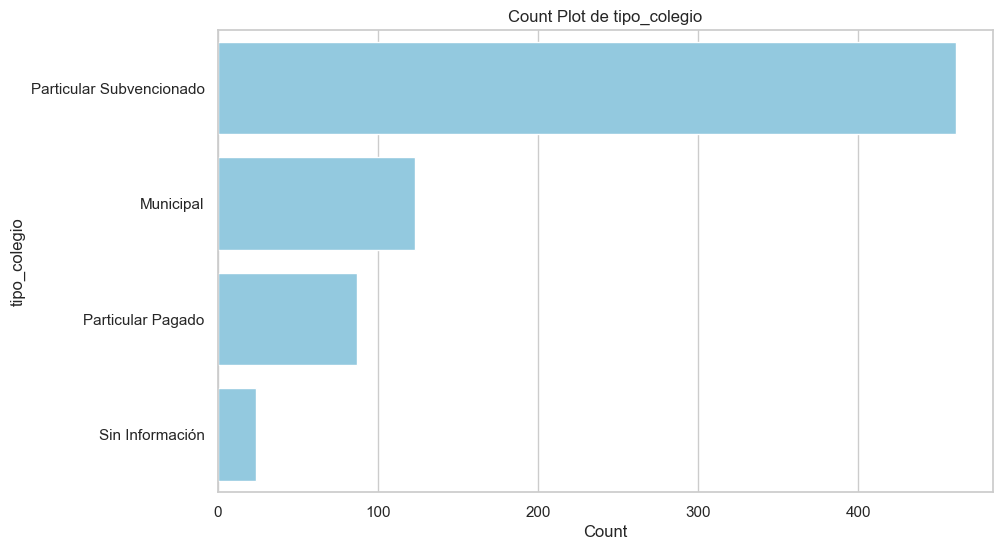

Bivariado


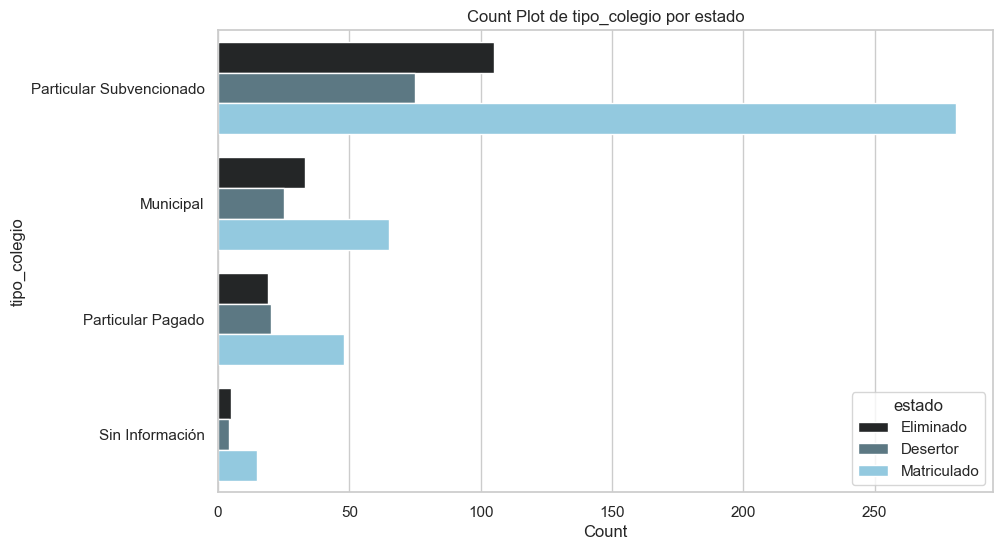

preferencia
Univariado


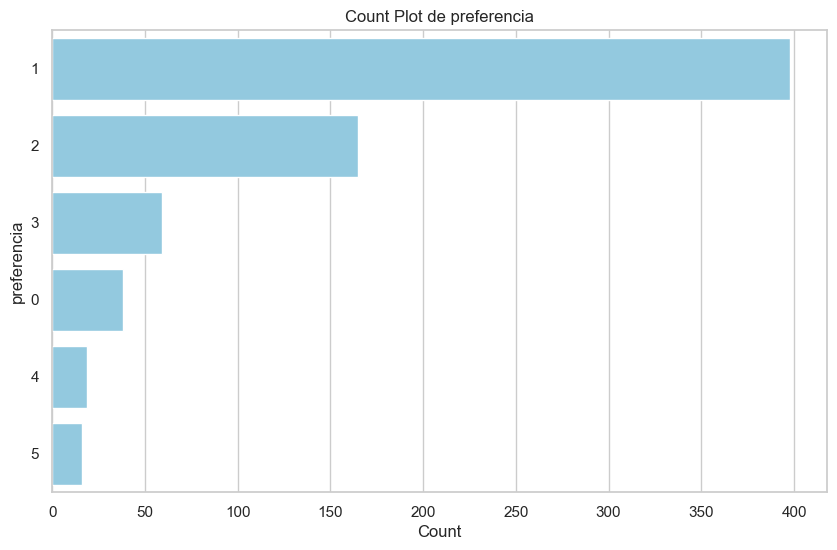

Bivariado


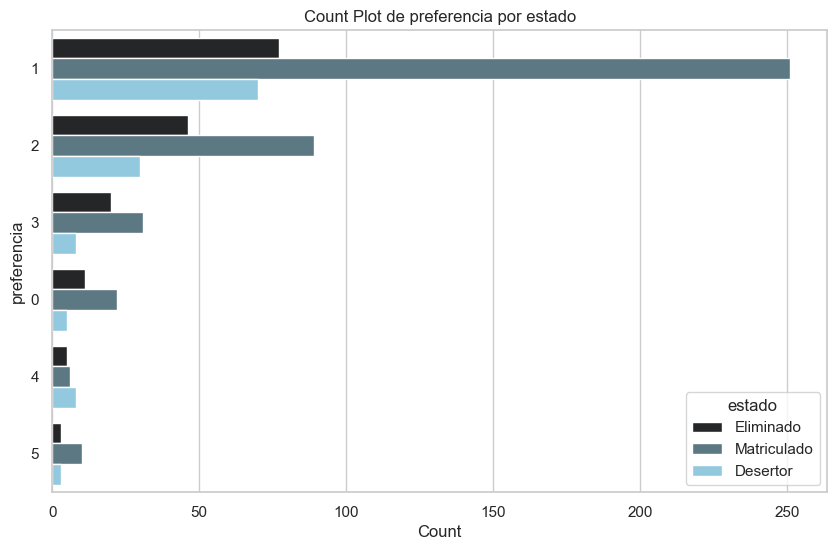

continuidad
Univariado


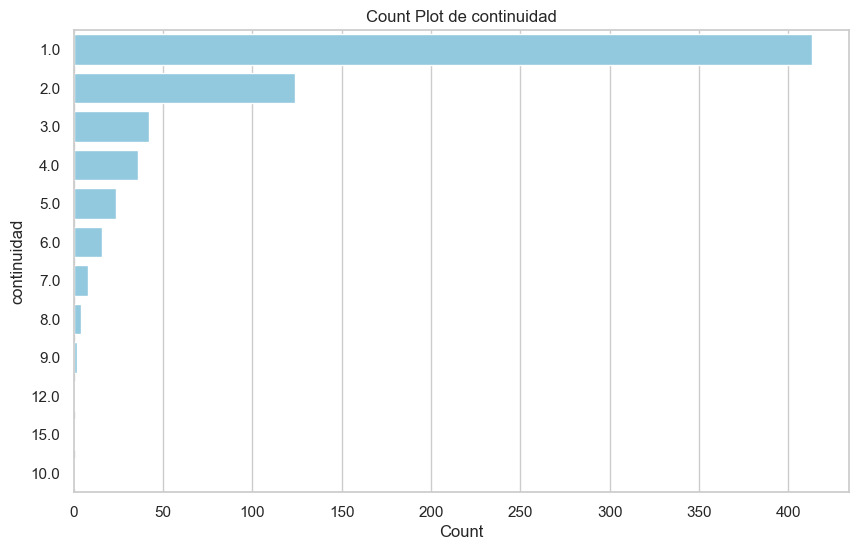

Bivariado


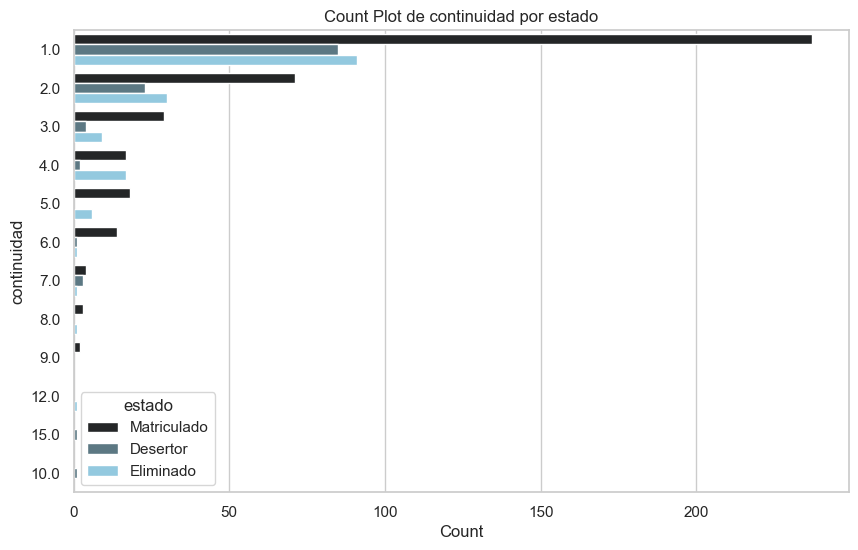

In [18]:
cols_count = [
    'region','tipo_colegio','preferencia','continuidad',
    
]

# Crear gráficos de conteo para columnas de tipo objeto
for column in cols_count:
    print(column)
    print('Univariado')
    create_countplot(df, column)
    print('Bivariado')
    create_countplot(df, column,'estado')